In [188]:
import json
import requests
import re
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns 

import sqlite3
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [206]:
key = 'vuGbXeoBrrLCUyzyOU7K2d31tnN7ofho3I0SCF7Q'
url = 'https://api.propublica.org/congress/v1/115/house/sessions/2/votes/215.json'
r = requests.get(url,headers={"X-API-KEY":'vuGbXeoBrrLCUyzyOU7K2d31tnN7ofho3I0SCF7Q'})
print(r)
print(type(r.text))
print(r.text)

<Response [200]>
<class 'str'>
{
   "status":"OK",
   "copyright":"Copyright (c) 2019 Pro Publica Inc. All Rights Reserved.",
   "results": {
      "votes": {
        "vote": {
           "congress": 115,
           "session": 2,
           "chamber": "House",
           "roll_call": 215,
           "source": "http://clerk.house.gov/evs/2018/roll215.xml",
           "url": "http://clerk.house.gov/evs/2018/roll215.xml",
            "bill": {
            "bill_id": "hr5682-115",
            "number": "H.R.5682",
            "api_uri": "https://api.propublica.org/congress/v1/115/bills/hr5682.json",
            "title": "To provide for programs to help reduce the risk that prisoners will recidivate upon release from prison, and for other purposes.",
            "short_title": "FIRST STEP Act",
            "latest_action": "Received in the Senate."
            },
            "amendment": {
            },
                      "question": "On Motion to Suspend the Rules and Pass, as Amended"

In [207]:
r.json().keys()

dict_keys(['status', 'copyright', 'results'])

In [208]:
house_votes = r.json()['results']['votes']['vote']['positions']
house_votes_df = pd.DataFrame(house_votes)

In [5]:
house_votes_df[29:71]

,district,dw_nominate,member_id,name,party,state,vote_position
29,1,-0.324,B001303,Lisa Blunt Rochester,D,DE,Yes
30,1,-0.392,B001278,Suzanne Bonamici,D,OR,No
31,12,0.259,B001295,Mike Bost,R,IL,Yes
32,13,-0.397,B001296,Brendan Boyle,D,PA,No
33,1,-0.484,B001227,Robert A. Brady,D,PA,No
34,8,0.518,B000755,Kevin Brady,R,TX,Yes
35,7,0.829,B001290,David A. Brat,R,VA,Yes
36,5,0.606,B001274,Mo Brooks,R,AL,Yes
37,5,0.376,B001284,Susan Brooks,R,IN,Yes
38,4,-0.342,B001304,Anthony Brown,D,MD,No


In [6]:
house_votes_df[house_votes_df['state'] == 'TN']

,district,dw_nominate,member_id,name,party,state,vote_position
25,6,0.580,B001273,Diane Black,R,TN,Not Voting
26,7,0.615,B001243,Marsha Blackburn,R,TN,Yes
68,9,-0.400,C001068,Steve Cohen,D,TN,Yes
77,5,-0.161,C000754,Jim Cooper,D,TN,Yes
104,4,0.593,D000616,Scott DesJarlais,R,TN,Yes
113,2,0.604,D000533,John J. Duncan Jr.,R,TN,Yes
126,3,0.471,F000459,Chuck Fleischmann,R,TN,Yes
215,8,0.541,K000392,David Kustoff,R,TN,Yes
322,1,0.493,R000582,Phil Roe,R,TN,Yes


In [7]:
house_votes_df.sort_values(by = "state")

,district,dw_nominate,member_id,name,party,state,vote_position
424,1,0.279,Y000033,Don Young,R,AK,Yes
323,3,0.338,R000575,Mike D. Rogers,R,AL,Yes
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes
36,5,0.606,B001274,Mo Brooks,R,AL,Yes
358,7,-0.390,S001185,Terri Sewell,D,AL,Yes
293,6,0.779,P000609,Gary Palmer,R,AL,Yes
47,1,0.544,B001289,Bradley Byrne,R,AL,Yes
321,2,0.367,R000591,Martha Roby,R,AL,Yes
83,1,0.381,C001087,Rick Crawford,R,AR,Yes
419,3,0.347,W000809,Steve Womack,R,AR,Yes


In [8]:
house_votes_df[house_votes_df['vote_position'] == 'No'].sort_values(by = 'state')

,district,dw_nominate,member_id,name,party,state,vote_position
156,3,-0.599,G000551,Raúl M. Grijalva,D,AZ,No
379,41,-0.465,T000472,Mark Takano,D,CA,No
143,34,-0.611,G000585,Jimmy Gomez,D,CA,No
280,32,-0.448,N000179,Grace F. Napolitano,D,CA,No
241,47,-0.449,L000579,Alan Lowenthal,D,CA,No
78,46,-0.275,C001110,J. Luis Correa,D,CA,No
60,27,-0.488,C001080,Judy Chu,D,CA,No
103,11,-0.532,D000623,Mark DeSaulnier,D,CA,No
204,17,-0.613,K000389,Ro Khanna,D,CA,No
335,40,-0.471,R000486,Lucille Roybal-Allard,D,CA,No


In [9]:
house_votes_df[house_votes_df['vote_position'] == 'Not Voting']

,district,dw_nominate,member_id,name,party,state,vote_position
25,6,0.580,B001273,Diane Black,R,TN,Not Voting
132,11,0.292,F000372,Rodney Frelinghuysen,R,NJ,Not Voting
170,3,0.531,H001077,Clay Higgins,R,LA,Not Voting
298,2,0.472,P000588,Steve Pearce,R,NM,Not Voting
324,5,0.333,R000395,Harold Rogers,R,KY,Not Voting
373,14,-0.383,S001175,Jackie Speier,D,CA,Not Voting
376,15,0.299,S001187,Steve Stivers,R,OH,Not Voting
406,1,-0.275,W000799,Tim Walz,D,MN,Not Voting


In [10]:
key = 'vuGbXeoBrrLCUyzyOU7K2d31tnN7ofho3I0SCF7Q'
url = 'https://api.propublica.org/congress/v1/115/senate/sessions/2/votes/271.json'
r = requests.get(url,headers={"X-API-KEY":key})
print(r)
print(type(r.text))
print(r.text)

<Response [200]>
<class 'str'>
{
   "status":"OK",
   "copyright":"Copyright (c) 2019 Pro Publica Inc. All Rights Reserved.",
   "results": {
      "votes": {
        "vote": {
           "congress": 115,
           "session": 2,
           "chamber": "Senate",
           "roll_call": 271,
           "source": "https://www.senate.gov/legislative/LIS/roll_call_votes/vote1152/vote_115_2_00271.xml",
           "url": "https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=115&session=2&vote=00271",
            "bill": {
            "bill_id": "s756-115",
            "number": "S.756",
            "api_uri": "https://api.propublica.org/congress/v1/115/bills/s756.json",
            "title": "A bill to reauthorize and amend the Marine Debris Act to promote international action to reduce marine debris, and for other purposes.",
            "short_title": "First Step Act of 2018",
            "latest_action": "Signed by President."
            },
            "am

In [11]:
senate_votes = r.json()['results']['votes']['vote']['positions']
senate_votes_df = pd.DataFrame(senate_votes)
senate_votes_df.head(50)

,dw_nominate,member_id,name,party,state,vote_position
0,0.323,A000360,Lamar Alexander,R,TN,Yes
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes
2,0.534,B001261,John Barrasso,R,WY,No
3,-0.207,B001267,Michael Bennet,D,CO,Yes
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes
5,0.430,B000575,Roy Blunt,R,MO,Yes
6,-0.612,B001288,Cory Booker,D,NJ,Yes
7,0.401,B001236,John Boozman,R,AR,Yes
8,-0.438,B000944,Sherrod Brown,D,OH,Yes
9,0.453,B001135,Richard M. Burr,R,NC,Yes


In [12]:
senate_votes_df[senate_votes_df['vote_position'] == 'No']

,dw_nominate,member_id,name,party,state,vote_position
2,0.534,B001261,John Barrasso,R,WY,No
21,0.613,C001095,Tom Cotton,R,AR,No
28,0.541,E000285,Michael B. Enzi,R,WY,No
51,0.482,K000393,John Kennedy,R,LA,No
54,NaN,K000352,Jon Kyl,R,AZ,No
65,0.208,M001153,Lisa Murkowski,R,AK,No
74,0.636,R000584,Jim Risch,R,ID,No
76,0.392,R000605,Mike Rounds,R,SD,No
77,0.578,R000595,Marco Rubio,R,FL,No
79,0.811,S001197,Ben Sasse,R,NE,No


In [13]:
senate_votes_df[senate_votes_df['vote_position'] == 'Not Voting']

,dw_nominate,member_id,name,party,state,vote_position
35,0.408,G000359,Lindsey Graham,R,SC,Not Voting


## Importing Private Prison Populations ##
From Bureau of Justice Statistics

Number of prisoners held in private prisons under the jurisdiction of state or federal correctional authorities, December 31, 1999-2016

Author(s): E. Ann Carson

Data source(s): National Prisoner Statistics Program

Date of version: 10/7/2017

In [14]:
private_prison_pop_df = pd.read_csv('pp_pop.csv', skiprows = 8, header = 1)
private_prison_pop_df.head(55)

,Jurisdiction,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,U.S. total,NaN,"68,960","91,579","86,421","88,370","90,123","92,569","107,433","113,697","124,150","129,482","129,333","127,945","130,972","137,220","133,363","131,723","126,272","128,323"
1,Federal/a,NaN,"3,828","15,524","12,736","14,732","16,281","18,709","27,046","27,726","31,310","33,162","34,087","33,830","38,546","40,446","41,159","40,017","34,934","34,159"
2,State,NaN,"65,132","76,055","73,685","73,638","73,842","73,860","80,387","85,971","92,840","96,320","95,246","94,115","92,426","96,774","92,204","91,706","91,338","94,164"
3,NaN,Alabama,0,0,0,0,"1,698",244,320,9,355,101,883,"1,024",545,538,554,481,398,348
4,NaN,Alaska/b,"1,387","1,383","1,537","1,360","1,386","1,392","1,365","1,681","1,524","1,450","1,626","1,598","1,688","1,733",27,595,593,551
5,NaN,Arizona,"1,392","1,430","1,429","1,965","2,323","4,176","4,800","5,213","7,790","8,369","8,971","5,356","6,457","6,435","6,405","6,955","6,471","8,285"
6,NaN,Arkansas,"1,214","1,540",0,0,0,0,0,/,/,/,/,0,0,0,0,0,0,0
7,NaN,California,"4,621","4,547","4,452","4,649","3,507","2,989","2,801","2,844","3,032","3,019","2,316","2,170",697,608,"2,026","2,376","2,195","7,005"
8,NaN,Colorado,0,"2,099","2,390","2,452","3,013","2,819","4,039","4,855","4,878","5,274","4,957","4,498","4,303","3,939","3,898","3,782","3,987","3,564"
9,NaN,Connecticut/b,0,/,/,0,0,0,0,0,0,927,885,883,855,817,725,647,524,508


In [15]:
private_prison_pop_df.rename(columns = {'Unnamed: 1':'State'}, inplace = True)

In [16]:
private_prison_pop_df.drop(index = ([54,55,56,57,58,59,60,61]), inplace = True)

In [17]:
private_prison_pop_df.drop(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
                            '2007', '2008', '2009'], axis = 1, inplace = True)

In [18]:
private_prison_pop_df.drop([6, 10, 11, 16, 18, 22, 24, 25, 26, 28, 30, 31, 32, 35, 40, 42, 47, 50, 51], inplace = True)

In [19]:
private_prison_pop_df.head()

,Jurisdiction,State,2010,2011,2012,2013,2014,2015,2016
0,U.S. total,NaN,"127,945","130,972","137,220","133,363","131,723","126,272","128,323"
1,Federal/a,NaN,"33,830","38,546","40,446","41,159","40,017","34,934","34,159"
2,State,NaN,"94,115","92,426","96,774","92,204","91,706","91,338","94,164"
3,NaN,Alabama,"1,024",545,538,554,481,398,348
4,NaN,Alaska/b,"1,598","1,688","1,733",27,595,593,551


In [20]:
private_prison_pop_df["State"] = private_prison_pop_df["State"].str.split('/', n = 1, expand = True)

In [21]:
private_prison_pop_df.head()

,Jurisdiction,State,2010,2011,2012,2013,2014,2015,2016
0,U.S. total,NaN,"127,945","130,972","137,220","133,363","131,723","126,272","128,323"
1,Federal/a,NaN,"33,830","38,546","40,446","41,159","40,017","34,934","34,159"
2,State,NaN,"94,115","92,426","96,774","92,204","91,706","91,338","94,164"
3,NaN,Alabama,"1,024",545,538,554,481,398,348
4,NaN,Alaska,"1,598","1,688","1,733",27,595,593,551


In [22]:
def abrv_conv(df, col):
    states = {
            'AK': 'Alaska',
            'AL': 'Alabama',
            'AR': 'Arkansas',
            'AS': 'American Samoa',
            'AZ': 'Arizona',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DC': 'District of Columbia',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'GU': 'Guam',
            'HI': 'Hawaii',
            'IA': 'Iowa',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'MA': 'Massachusetts',
            'MD': 'Maryland',
            'ME': 'Maine',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MO': 'Missouri',
            'MP': 'Northern Mariana Islands',
            'MS': 'Mississippi',
            'MT': 'Montana',
            'NA': 'National',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'NE': 'Nebraska',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NV': 'Nevada',
            'NY': 'New York',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'PR': 'Puerto Rico',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VA': 'Virginia',
            'VI': 'Virgin Islands',
            'VT': 'Vermont',
            'WA': 'Washington',
            'WI': 'Wisconsin',
            'WV': 'West Virginia',
            'WY': 'Wyoming'
    }

    state_abrv = {v:k for k,v in states.items()}
    new = df[col].map(state_abrv)
    df[col]= new

In [23]:
abrv_conv(private_prison_pop_df, 'State')

In [24]:
private_prison_pop_df.head()

,Jurisdiction,State,2010,2011,2012,2013,2014,2015,2016
0,U.S. total,NaN,"127,945","130,972","137,220","133,363","131,723","126,272","128,323"
1,Federal/a,NaN,"33,830","38,546","40,446","41,159","40,017","34,934","34,159"
2,State,NaN,"94,115","92,426","96,774","92,204","91,706","91,338","94,164"
3,NaN,AL,"1,024",545,538,554,481,398,348
4,NaN,AK,"1,598","1,688","1,733",27,595,593,551


## Federal Prisons, Including Private Prisons ##

In [197]:
url = 'http://www.bop.gov/PublicInfo/execute/locations/?todo=query&output=json '
r = requests.get(url)
print(r)
print(type(r.text))
print(r.text)

<Response [200]>
<class 'str'>
{"Messages":{},"Locations":[{"code":"ACC","name":"Adams County","nameTitle":"CI Adams County","nameDisplay":"Adams County CI","complexCode":"","type":"CI","securityLevel":"Low","region":"Southeast Region","latitude":"31.555353139426984","longitude":"-91.21853828430176","url":"/locations/ci/acc/","timeZone":"C","address":"20 HOBO FORK ROAD","city":"NATCHEZ","state":"MS","zipCode":"39120","phoneNumber":"601-304-2500","contactEmail":"ACC/General@bop.gov","locationtype":"inst","privateFacl":"t","gender":"male","special":false,"faclTypeDescription":"Correctional Institution","hasCamp":false,"imageNormal":"","imageSmall":"","hasFsl":false,"hasFdc":false,"hasSff":false,"hasIhp":true},{"code":"ALD","name":"Alderson","nameTitle":"FPC Alderson","nameDisplay":"Alderson FPC","complexCode":"","type":"FPC","securityLevel":"Minimum","region":"Mid-Atlantic Region","latitude":"37.725277605059226","longitude":"-80.65844535827637","url":"/locations/institutions/ald/","timeZ

In [198]:
r.json().keys()

dict_keys(['Messages', 'Locations', 'FormToken'])

In [199]:
bop_facilities = r.json()['Locations']
bop_facilities = pd.DataFrame(bop_facilities)

In [200]:
bop_facilities

,address,city,code,complexCode,contactEmail,faclTypeDescription,gender,hasCamp,hasFdc,hasFsl,...,phoneNumber,privateFacl,region,securityLevel,special,state,timeZone,type,url,zipCode
0,20 HOBO FORK ROAD,NATCHEZ,ACC,,ACC/General@bop.gov,Correctional Institution,male,False,False,False,...,601-304-2500,t,Southeast Region,Low,False,MS,C,CI,/locations/ci/acc/,39120
1,GLEN RAY RD. BOX A,ALDERSON,ALD,,ALD/ExecAssistant@bop.gov,Federal Prison Camp,female,False,False,False,...,304-445-3300,f,Mid-Atlantic Region,Minimum,False,WV,E,FPC,/locations/institutions/ald/,24910
2,11070 HIGHWAY 14,ALICEVILLE,ALI,,ALI/ExecAssistant@bop.gov,Federal Correctional Institution,female,True,False,False,...,205-373-5000,f,Southeast Region,Low,False,AL,C,FCI,/locations/institutions/ali/,35442
3,"RT 15,2 MILES N OF ALLENWOOD",ALLENWOOD,ALF,ALX,ALX/execassistant@bop.gov,Federal Correctional Institution,male,False,False,False,...,570-547-1990,f,Northeast Region,Low,False,PA,E,FCI,/locations/institutions/alf/,17810
4,"RT 15, 2 MI N OF ALLENWOOD",WHITE DEER,ALM,ALX,ALX/execassistant@bop.gov,Federal Correctional Institution,male,False,False,False,...,570-547-7950,f,Northeast Region,Medium,False,PA,E,FCI,/locations/institutions/alm/,17810
5,PO BOX 1000,MONTGOMERY,ALX,ALX,ALX/execassistant@bop.gov,Federal Correctional Complex,male,False,False,False,...,-1--1,f,Northeast Region,N/A,False,PA,E,FCC,/locations/search.jsp?q=FCC+Allenwood&name=All...,17752
6,"RT 15,2 MILES N OF ALLENWOOD",ALLENWOOD,ALP,ALX,ALX/execassistant@bop.gov,U.S. Penitentiary,male,False,False,False,...,570-547-0963,f,Northeast Region,High,False,PA,E,USP,/locations/institutions/alp/,17810
7,ST. ROUTE 716,ASHLAND,ASH,,ASH/ExecAssistant@bop.gov,Federal Correctional Institution,male,True,False,False,...,606-928-6414,f,Mid-Atlantic Region,Low,False,KY,E,FCI,/locations/institutions/ash/,41105
8,719 MCDONOUGH BLVD S.E.,ATLANTA,CAT,,CAT/CCM@bop.gov,Residential Reentry Office,n/a,False,False,False,...,404-635-5679,f,Southeast Region,N/A,False,GA,E,RRM,/locations/ccm/cat,30315
9,601 MCDONOUGH BLVD SE,ATLANTA,ATL,,ATL/PublicInformation@bop.gov,U.S. Penitentiary,male,True,True,False,...,404-635-5100,f,Southeast Region,Medium,False,GA,E,USP,/locations/institutions/atl/,30315


In [201]:
bop_facilities.drop(['address', 'code', 'complexCode', 'contactEmail',
       'gender', 'hasCamp', 'hasFdc', 'hasFsl',
       'hasIhp', 'hasSff', 'imageNormal', 'imageSmall', 'latitude',
       'locationtype', 'longitude', 'name', 'nameDisplay', 'nameTitle',
       'phoneNumber', 'region', 'securityLevel', 'special',
       'timeZone', 'url', 'zipCode'], axis = 1, inplace = True)

In [202]:
bop_facilities = bop_facilities.sort_values(by=['state'])

In [203]:
bop_facilities.head()

,city,faclTypeDescription,privateFacl,state,type
2,ALICEVILLE,Federal Correctional Institution,f,AL,FCI
107,MONTGOMERY,Residential Reentry Office,f,AL,RRM
156,TALLADEGA,Federal Correctional Institution,f,AL,FCI
106,MONTGOMERY,Federal Prison Camp,f,AL,FPC
60,FORREST CITY,Federal Correctional Institution,f,AR,FCI


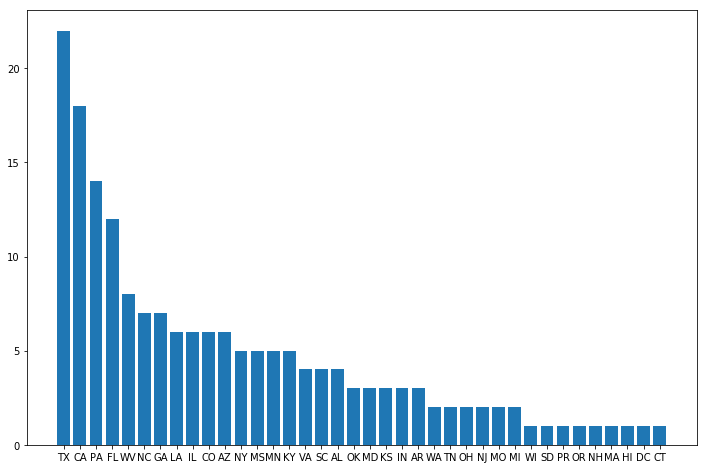

In [204]:
state_bag = {}
for state in bop_facilities["state"]:
    state_bag[state] = state_bag.get(state, 0) + 1
state_freq = sorted(state_bag.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
x = [s[0] for s in state_freq]
y = [s[1] for s in state_freq]
plt.figure(figsize = (12, 8))
plt.bar(x, y)
plt.show();

In [211]:
state_bag

{'AL': 4,
 'AR': 3,
 'AZ': 6,
 'CA': 18,
 'CO': 6,
 'CT': 1,
 'DC': 1,
 'FL': 12,
 'GA': 7,
 'HI': 1,
 'IL': 6,
 'IN': 3,
 'KS': 3,
 'KY': 5,
 'LA': 6,
 'MA': 1,
 'MD': 3,
 'MI': 2,
 'MN': 5,
 'MO': 2,
 'MS': 5,
 'NC': 7,
 'NH': 1,
 'NJ': 2,
 'NY': 5,
 'OH': 2,
 'OK': 3,
 'OR': 1,
 'PA': 14,
 'PR': 1,
 'SC': 4,
 'SD': 1,
 'TN': 2,
 'TX': 22,
 'VA': 4,
 'WA': 2,
 'WI': 1,
 'WV': 8}

In [214]:
prison_freq_df = pd.DataFrame({"state": x,"prison_freq": y})

In [215]:
prison_freq_df

,state,prison_freq
0,TX,22
1,CA,18
2,PA,14
3,FL,12
4,WV,8
5,NC,7
6,GA,7
7,LA,6
8,IL,6
9,CO,6


In [196]:
np.array(y).mean()

4.7368421052631575

## Checking for Prison/House Votes Correlation ##  

In [217]:
prisons_df = house_votes_df.merge(prison_freq_df, how='left', on='state')
prisons_df

,district,dw_nominate,member_id,name,party,state,vote_position,prison_freq
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,6.0
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,7.0
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,4.0
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,18.0
4,12,0.611,A000372,Rick Allen,R,GA,Yes,7.0
5,3,0.648,A000367,Justin Amash,R,MI,Yes,2.0
6,2,0.375,A000369,Mark Amodei,R,NV,Yes,NaN
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes,22.0
8,36,0.693,B001291,Brian Babin,R,TX,Yes,22.0
9,2,0.432,B001298,Don Bacon,R,NE,Yes,NaN


In [219]:
prisons_df.fillna(0)

,district,dw_nominate,member_id,name,party,state,vote_position,prison_freq
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,6.0
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,7.0
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,4.0
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,18.0
4,12,0.611,A000372,Rick Allen,R,GA,Yes,7.0
5,3,0.648,A000367,Justin Amash,R,MI,Yes,2.0
6,2,0.375,A000369,Mark Amodei,R,NV,Yes,0.0
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes,22.0
8,36,0.693,B001291,Brian Babin,R,TX,Yes,22.0
9,2,0.432,B001298,Don Bacon,R,NE,Yes,0.0


In [222]:
high_prison_yay = prisons_df["vote_position"][(prisons_df["prison_freq"]>=5)&(prisons_df["vote_position"]=="Yes")].count()

In [224]:
high_prison_nay = prisons_df["vote_position"][(prisons_df["prison_freq"]>=5)&(prisons_df["vote_position"]=="No")].count()

In [226]:
low_prison_yay = prisons_df["vote_position"][(prisons_df["prison_freq"]<5)&(prisons_df["vote_position"]=="Yes")].count()

In [228]:
low_prison_nay = prisons_df["vote_position"][(prisons_df["prison_freq"]<5)&(prisons_df["vote_position"]=="No")].count()

In [229]:
high_prison = [high_prison_yay, high_prison_nay]
low_prison = [low_prison_yay, low_prison_nay]

In [230]:
stats.chisquare(high_prison, low_prison)

Power_divergenceResult(statistic=56.864583333333336, pvalue=4.6687886149017033e-14)

## Checking for Prison/Senate Votes Correlation ##  

In [231]:
prisons_df = senate_votes_df.merge(prison_freq_df, how='left', on='state')
prisons_df

,dw_nominate,member_id,name,party,state,vote_position,prison_freq
0,0.323,A000360,Lamar Alexander,R,TN,Yes,2.0
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,1.0
2,0.534,B001261,John Barrasso,R,WY,No,NaN
3,-0.207,B001267,Michael Bennet,D,CO,Yes,6.0
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,1.0
5,0.430,B000575,Roy Blunt,R,MO,Yes,2.0
6,-0.612,B001288,Cory Booker,D,NJ,Yes,2.0
7,0.401,B001236,John Boozman,R,AR,Yes,3.0
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,2.0
9,0.453,B001135,Richard M. Burr,R,NC,Yes,7.0


In [232]:
prisons_df.fillna(0)

,dw_nominate,member_id,name,party,state,vote_position,prison_freq
0,0.323,A000360,Lamar Alexander,R,TN,Yes,2.0
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,1.0
2,0.534,B001261,John Barrasso,R,WY,No,0.0
3,-0.207,B001267,Michael Bennet,D,CO,Yes,6.0
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,1.0
5,0.430,B000575,Roy Blunt,R,MO,Yes,2.0
6,-0.612,B001288,Cory Booker,D,NJ,Yes,2.0
7,0.401,B001236,John Boozman,R,AR,Yes,3.0
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,2.0
9,0.453,B001135,Richard M. Burr,R,NC,Yes,7.0


In [233]:
high_prison_yay = prisons_df["vote_position"][(prisons_df["prison_freq"]>=5)&(prisons_df["vote_position"]=="Yes")].count()

In [234]:
high_prison_nay = prisons_df["vote_position"][(prisons_df["prison_freq"]>=5)&(prisons_df["vote_position"]=="No")].count()

In [235]:
low_prison_yay = prisons_df["vote_position"][(prisons_df["prison_freq"]<5)&(prisons_df["vote_position"]=="Yes")].count()

In [236]:
low_prison_nay = prisons_df["vote_position"][(prisons_df["prison_freq"]<5)&(prisons_df["vote_position"]=="No")].count()

In [237]:
high_prison = [high_prison_yay, high_prison_nay]
low_prison = [low_prison_yay, low_prison_nay]

In [238]:
stats.chisquare(high_prison, low_prison)

Power_divergenceResult(statistic=3.1842105263157894, pvalue=0.0743529053685636)

## Webscraping for GEO Group PAC Donations to Candidates ##

In [ ]:
# html_page = requests.get('https://www.opensecrets.org/pacs/pacgot.php?cycle=2016&cmte=C00382150') #Make a get request to retrieve the page
# soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [ ]:
# soup

In [ ]:
# container = soup.find('tbody').get_text()
# container

In [ ]:
# ( )(\w+)((\w+))(\d+)'
# Kennedy, Joe III (D-MA)$0

In [ ]:
# testReg = re.compile(r'(\w+, \w+ )( \w+)?(\D+\d+,?\d*)')
# testReg.findall(container)
# # + is 1 to infinity, * is zero to infinity

## 2016 GEO Donations to House ##

In [45]:
house_2016_geo_df = pd.read_csv('2016_geo_house.csv', header = 1)

In [46]:
house_2016_geo_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2016_GEO_Donation'}, inplace = True)

In [47]:
house_2016_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2016 GEO Donations to Senate ##

In [48]:
senate_2016_geo_df = pd.read_csv('2016_geo_senate.csv', header = 1)

In [49]:
senate_2016_geo_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2016_GEO_Donation'}, inplace = True)

In [50]:
senate_2016_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2018 GEO Donations to House ##

In [51]:
house_2018_geo_df = pd.read_csv('2018_geo_house.csv', header = 1)

In [52]:
house_2018_geo_df.rename(columns={'Donation_Amount': '2018_GEO_Donation'}, inplace = True)

In [53]:
house_2018_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2018 GEO Donations to Senate ##

In [54]:
senate_2018_geo_df = pd.read_csv('2018_geo_senate.csv', header = 1)

In [55]:
senate_2018_geo_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2018_GEO_Donation'}, inplace = True)

In [56]:
senate_2018_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2016 CoreCivic Donations to House ##

In [57]:
house_2016_cc_df = pd.read_csv('2016_cc_house.csv', header = 1)

In [58]:
house_2016_cc_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2016_CC_Donation'}, inplace = True)

In [59]:
house_2016_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2016 CoreCivic Donations to Senate ##

In [60]:
senate_2016_cc_df = pd.read_csv('2016_cc_senate.csv', header = 1)

In [61]:
senate_2016_cc_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2016_CC_Donation'}, inplace = True)

In [62]:
senate_2016_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2018 CoreCivic Donations to House ##

In [ ]:
house_2018_cc_df = pd.read_csv('2018_cc_house.csv', header = 1)

In [ ]:
house_2018_cc_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2018_CC_Donation'}, inplace = True)

In [ ]:
house_2018_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

## 2018 CoreCivic Donations to Senate ##

In [63]:
senate_2018_cc_df = pd.read_csv('2018_cc_senate.csv', header = 1)

In [64]:
senate_2018_cc_df.rename(columns={'Name': 'Name', 'Donation_Amount': '2018_CC_Donation'}, inplace = True)

In [65]:
senate_2018_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'], axis = 1, inplace=True)

## Add Member ID To PAC Donation Dataframes ##

In [130]:
def name_to_mem_id(roll_call_df, donation_df):
# Takes the donated name and match with the roll call id number
    for idx, row in donation_df.iterrows():
        name_pattern = re.match(r'(\w+?\s?-?\w+),\s(\w+?\s?-?\w+)\s\(([D|R|I])-(\w{2})\)', row["Name"])
        last_name = name_pattern.group(1)
        first_name = name_pattern.group(2)
        party = name_pattern.group(3)
        state = name_pattern.group(4)
        search = roll_call_df["member_id"][(roll_call_df["state"] == state) & 
                                            (roll_call_df["party"] == party) & 
                                            (roll_call_df["name"].str.find(last_name)!=-1)]
        if search.size == 1:
            donation_df.loc[idx, "member_id"] = search.values[0]
        elif search.size > 1:
            donation_df.loc[idx, "member_id"] = "ambiguous"
        else:
            donation_df.loc[idx, "member_id"] = "didnt_vote"
    return donation_df

In [131]:
name_to_mem_id(house_votes_df, house_2016_geo_df)

,Name,2016_GEO_Donation,member_id
0,"Bacon, Donald John (R-NE)","$5,000",B001298
1,"Barton, Joe (R-TX)","$2,500",B000213
2,"Bergman, John (R-MI)","$5,000",B001301
3,"Bishop, Mike (R-MI)","$6,000",B001293
4,"Blum, Rod (R-IA)","$5,000",B001294
5,"Brady, Kevin (R-TX)","$5,000",B000755
6,"Carter, John (R-TX)","$2,500",C001051
7,"Comstock, Barbara (R-VA)","$5,000",C001105
8,"Cuellar, Henry (D-TX)","$9,690",C001063
9,"Culberson, John (R-TX)","$5,000",C001048


In [132]:
name_to_mem_id(house_votes_df, house_2016_cc_df)

,Name,2016_CC_Donation,member_id
0,"Aderholt, Robert B (R-AL)","$2,500.00",A000055
1,"Babeu, Paul (R-AZ)","$1,000.00",didnt_vote
2,"Bishop, Sanford (D-GA)","$2,500.00",B000490
3,"Black, Diane (R-TN)","$6,000.00",ambiguous
4,"Blackburn, Marsha (R-TN)","$4,500.00",B001243
5,"Boehner, John (R-OH)","($5,000.00)",didnt_vote
6,"Carter, John (R-TX)","$5,000.00",C001051
7,"Conaway, Mike (R-TX)","$2,500.00",C001062
8,"Crenshaw, Ander (R-FL)","$5,000.00",didnt_vote
9,"Cuellar, Henry (D-TX)","$4,000.00",C001063


In [133]:
name_to_mem_id(senate_votes_df, senate_2016_geo_df)

,Name,2016_GEO_Donation,member_id
0,"Ayotte, Kelly (R-NH)","$5,000",didnt_vote
1,"Blunt, Roy (R-MO)","$5,000",B000575
2,"Burr, Richard (R-NC)","$5,000",B001135
3,"Cornyn, John (R-TX)","($2,000)",C001056
4,"Hatch, Orrin G (R-UT)","$5,000",H000338
5,"Heck, Joe (R-NV)","$5,000",didnt_vote
6,"Hoeven, John (R-ND)","$2,500",H001061
7,"Isakson, Johnny (R-GA)","$5,000",I000055
8,"Johnson, Ron (R-WI)","$7,500",J000293
9,"Lee, Mike (R-UT)","$10,000",L000577


In [134]:
name_to_mem_id(senate_votes_df, senate_2016_cc_df)

,Name,2016_CC_Donation,member_id
0,"Ayotte, Kelly (R-NH)","$2,500.00",didnt_vote
1,"Blunt, Roy (R-MO)","$2,500.00",B000575
2,"Boozman, John (R-AR)","$3,000.00",B001236
3,"Burr, Richard (R-NC)","$2,500.00",B001135
4,"Hatch, Orrin G (R-UT)","$2,500.00",H000338
5,"Heck, Joe (R-NV)","$2,500.00",didnt_vote
6,"Hoeven, John (R-ND)","$6,000.00",H001061
7,"Isakson, Johnny (R-GA)","$2,500.00",I000055
8,"McCain, John (R-AZ)","$1,000.00",didnt_vote
9,"Moran, Jerry (R-KS)","$2,500.00",M000934


## Merge 2016 PAC Donations To Roll Call - House ##

In [135]:
temp_df = house_votes_df.merge(house_2016_geo_df, how='left', on='member_id')
h_votes_donations = temp_df.merge(house_2016_cc_df, how='left', on='member_id')
h_votes_donations

,district,dw_nominate,member_id,name,party,state,vote_position,Name_x,2016_GEO_Donation,Name_y,2016_CC_Donation
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,NaN,NaN,NaN,NaN
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,NaN,NaN,NaN,NaN
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,NaN,NaN,"Aderholt, Robert B (R-AL)","$2,500.00"
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,NaN,NaN,NaN,NaN
4,12,0.611,A000372,Rick Allen,R,GA,Yes,NaN,NaN,NaN,NaN
5,3,0.648,A000367,Justin Amash,R,MI,Yes,NaN,NaN,NaN,NaN
6,2,0.375,A000369,Mark Amodei,R,NV,Yes,NaN,NaN,NaN,NaN
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes,NaN,NaN,NaN,NaN
8,36,0.693,B001291,Brian Babin,R,TX,Yes,NaN,NaN,NaN,NaN
9,2,0.432,B001298,Don Bacon,R,NE,Yes,"Bacon, Donald John (R-NE)","$5,000",NaN,NaN


## Merge 2016 PAC Donations To Roll Call - Senate ##

In [136]:
temp_df = senate_votes_df.merge(senate_2016_geo_df, how='left', on='member_id')
s_votes_donations = temp_df.merge(senate_2016_cc_df, how='left', on='member_id')
s_votes_donations

,dw_nominate,member_id,name,party,state,vote_position,Name_x,2016_GEO_Donation,Name_y,2016_CC_Donation
0,0.323,A000360,Lamar Alexander,R,TN,Yes,NaN,NaN,NaN,NaN
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,NaN,NaN,NaN,NaN
2,0.534,B001261,John Barrasso,R,WY,No,NaN,NaN,NaN,NaN
3,-0.207,B001267,Michael Bennet,D,CO,Yes,NaN,NaN,NaN,NaN
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,NaN,NaN,NaN,NaN
5,0.430,B000575,Roy Blunt,R,MO,Yes,"Blunt, Roy (R-MO)","$5,000","Blunt, Roy (R-MO)","$2,500.00"
6,-0.612,B001288,Cory Booker,D,NJ,Yes,NaN,NaN,NaN,NaN
7,0.401,B001236,John Boozman,R,AR,Yes,NaN,NaN,"Boozman, John (R-AR)","$3,000.00"
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,NaN,NaN,NaN,NaN
9,0.453,B001135,Richard M. Burr,R,NC,Yes,"Burr, Richard (R-NC)","$5,000","Burr, Richard (R-NC)","$2,500.00"


## Clean 2016 House Table ## 

In [137]:
h_votes_donations.drop(['Name_x', 'Name_y'], axis =1, inplace=True)

In [138]:
h_votes_donations.fillna(value = '$0.0', inplace=True)

In [139]:
h_votes_donations.head()

,district,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,$0.0,$0.0
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,$0.0,$0.0
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,$0.0,"$2,500.00"
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,$0.0,$0.0
4,12,0.611,A000372,Rick Allen,R,GA,Yes,$0.0,$0.0


## Clean 2016 Senate Table ## 

In [140]:
s_votes_donations.drop(['Name_x', 'Name_y'], axis =1, inplace=True)

In [141]:
s_votes_donations.fillna(value = '$0.0', inplace=True)

In [142]:
s_votes_donations.head()

,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
0,0.323,A000360,Lamar Alexander,R,TN,Yes,$0.0,$0.0
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,$0.0,$0.0
2,0.534,B001261,John Barrasso,R,WY,No,$0.0,$0.0
3,-0.207,B001267,Michael Bennet,D,CO,Yes,$0.0,$0.0
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,$0.0,$0.0


## Transform Donations into Boolean Values ##

In [143]:
# for x in range(len(s_votes_donations)):
#     if (s_votes_donations.loc[x, "2016_GEO_Donation"]=="$0.0") & (s_votes_donations.loc[x, "2016_CC_Donation"]=="$0.0"):
#         s_votes_donations.loc[x, "donation"] = True
#     else:
#         s_votes_donations.loc[x, "donation"] = False

## House ##

In [144]:
for x in range(len(h_votes_donations)):
    if (h_votes_donations.loc[x, "2016_GEO_Donation"]=="$0.0") & (h_votes_donations.loc[x, "2016_CC_Donation"]=="$0.0"):
        h_votes_donations.loc[x, "no_donation"] = True
    else:
        h_votes_donations.loc[x, "no_donation"] = False
        
# true if the candidate did not take any donations
# false if the candidate did take a donation

In [145]:
h_votes_donations.head()

,district,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation,no_donation
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,$0.0,$0.0,True
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,$0.0,$0.0,True
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,$0.0,"$2,500.00",False
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,$0.0,$0.0,True
4,12,0.611,A000372,Rick Allen,R,GA,Yes,$0.0,$0.0,True


In [146]:
h_votes_donations[(h_votes_donations["vote_position"]=="Not Voting") | 
                  (h_votes_donations["vote_position"]=="Speaker")]

,district,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation,no_donation
25,6,0.580,B001273,Diane Black,R,TN,Not Voting,$0.0,$0.0,True
132,11,0.292,F000372,Rodney Frelinghuysen,R,NJ,Not Voting,$0.0,"$5,000.00",False
170,3,0.531,H001077,Clay Higgins,R,LA,Not Voting,$0.0,$0.0,True
298,2,0.472,P000588,Steve Pearce,R,NM,Not Voting,$0.0,$0.0,True
324,5,0.333,R000395,Harold Rogers,R,KY,Not Voting,$0.0,$0.0,True
373,14,-0.383,S001175,Jackie Speier,D,CA,Not Voting,$0.0,$0.0,True
376,15,0.299,S001187,Steve Stivers,R,OH,Not Voting,$0.0,$0.0,True
406,1,-0.275,W000799,Tim Walz,D,MN,Not Voting,$0.0,$0.0,True
427,1,0.556,R000570,Paul D. Ryan,R,WI,Speaker,$0.0,$0.0,True


In [147]:
h_votes_donations.drop(index=[25, 132, 170, 298, 324, 373, 376, 406, 427], axis=0, inplace=True)

## House Conditional Totals  (vote: yes or no, donation: yes or no) ##

In [162]:
# total count of those in House that did not take a donation and voted no
h_votes_donations[(h_votes_donations['no_donation'] == True) 
                  & (h_votes_donations['vote_position'] == 'No')].count()

district             57
dw_nominate          57
member_id            57
name                 57
party                57
state                57
vote_position        57
2016_GEO_Donation    57
2016_CC_Donation     57
no_donation          57
dtype: int64

In [163]:
# total count of those in House that did not take a donation and voted yes
h_votes_donations[(h_votes_donations['no_donation'] == True) 
                  & (h_votes_donations['vote_position'] == 'Yes')].count()

district             315
dw_nominate          315
member_id            315
name                 315
party                315
state                315
vote_position        315
2016_GEO_Donation    315
2016_CC_Donation     315
no_donation          315
dtype: int64

In [164]:
# total count of those in House that did take a donation and voted yes
h_votes_donations[(h_votes_donations['no_donation'] == False) 
                  & (h_votes_donations['vote_position'] == 'Yes')].count()

district             45
dw_nominate          45
member_id            45
name                 45
party                45
state                45
vote_position        45
2016_GEO_Donation    45
2016_CC_Donation     45
no_donation          45
dtype: int64

In [161]:
# total count of those in House who did take a donation and voted no
h_votes_donations[(h_votes_donations['no_donation'] == False) 
                  & (h_votes_donations['vote_position'] == 'No')].count()

district             2
dw_nominate          2
member_id            2
name                 2
party                2
state                2
vote_position        2
2016_GEO_Donation    2
2016_CC_Donation     2
no_donation          2
dtype: int64

In [180]:
##### did not take a donation and voted yes vs 
##### did not take a donation and voted no

house_no_donation = np.array([315, 57])
house_no_donation

array([315,  57])

In [181]:
##### did take a donation and voted yes vs 
##### did take a donation and voted no

house_donation = np.array([45, 2])
house_donation

array([45,  2])

In [182]:
stats.chisquare(house_donation, house_no_donation)

Power_divergenceResult(statistic=284.49874686716794, pvalue=7.857214479339502e-64)

## Senate ##

In [166]:
for x in range(len(s_votes_donations)):
    if (s_votes_donations.loc[x, "2016_GEO_Donation"]=="$0.0") & (s_votes_donations.loc[x, "2016_CC_Donation"]=="$0.0"):
        s_votes_donations.loc[x, "no_donation"] = True
    else:
        s_votes_donations.loc[x, "no_donation"] = False
        
# true if the candidate did not take any donations
# false if the candidate did take a donation

In [167]:
s_votes_donations

,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation,no_donation
0,0.323,A000360,Lamar Alexander,R,TN,Yes,$0.0,$0.0,True
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,$0.0,$0.0,True
2,0.534,B001261,John Barrasso,R,WY,No,$0.0,$0.0,True
3,-0.207,B001267,Michael Bennet,D,CO,Yes,$0.0,$0.0,True
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,$0.0,$0.0,True
5,0.43,B000575,Roy Blunt,R,MO,Yes,"$5,000","$2,500.00",False
6,-0.612,B001288,Cory Booker,D,NJ,Yes,$0.0,$0.0,True
7,0.401,B001236,John Boozman,R,AR,Yes,$0.0,"$3,000.00",False
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,$0.0,$0.0,True
9,0.453,B001135,Richard M. Burr,R,NC,Yes,"$5,000","$2,500.00",False


In [168]:
s_votes_donations[s_votes_donations["vote_position"]== "Not Voting"]

,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation,no_donation
35,0.408,G000359,Lindsey Graham,R,SC,Not Voting,$0.0,$0.0,True


In [169]:
s_votes_donations.drop(index = 35, axis=0, inplace=True)

## Senate Conditional Totals  (vote: yes or no, donation: yes or no) ##

In [172]:
# total count of those in Senate that did not take a donation and voted yes
s_votes_donations[(s_votes_donations['no_donation'] == True) 
                  & (s_votes_donations['vote_position'] == 'Yes')].count()

dw_nominate          68
member_id            68
name                 68
party                68
state                68
vote_position        68
2016_GEO_Donation    68
2016_CC_Donation     68
no_donation          68
dtype: int64

In [170]:
# total count of those in Senate that did not take a donation and voted no
s_votes_donations[(s_votes_donations['no_donation'] == True) 
                  & (s_votes_donations['vote_position'] == 'No')].count()

dw_nominate          10
member_id            10
name                 10
party                10
state                10
vote_position        10
2016_GEO_Donation    10
2016_CC_Donation     10
no_donation          10
dtype: int64

In [173]:
# total count of those in Senate that did take a donation and voted yes
s_votes_donations[(s_votes_donations['no_donation'] == False) 
                  & (s_votes_donations['vote_position'] == 'Yes')].count()

dw_nominate          19
member_id            19
name                 19
party                19
state                19
vote_position        19
2016_GEO_Donation    19
2016_CC_Donation     19
no_donation          19
dtype: int64

In [171]:
# total count of those in Senate who did take a donation and voted no
s_votes_donations[(s_votes_donations['no_donation'] == False) 
                  & (s_votes_donations['vote_position'] == 'No')].count()

dw_nominate          2
member_id            2
name                 2
party                2
state                2
vote_position        2
2016_GEO_Donation    2
2016_CC_Donation     2
no_donation          2
dtype: int64

In [183]:
##### did not take a donation and voted yes vs 
##### did not take a donation and voted no

senate_no_donation = np.array([68, 10])
senate_no_donation

array([68, 10])

In [184]:
##### did take a donation and voted yes vs 
##### did take a donation and voted no

senate_donation = np.array([19, 2])
senate_donation

array([19,  2])

In [185]:
stats.chisquare(senate_donation, senate_no_donation)

Power_divergenceResult(statistic=41.70882352941177, pvalue=1.0592984635846595e-10)